In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [4]:
# Convertendo a coluna para o timpo DateTime do pandas
ufo['Time'] = pd.to_datetime(ufo.Time)

In [5]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [6]:
# Observe o novo tipo de dado
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

<blockquote> As vantagens do uso <code>datetime</code> do pandas é o fácil acesso aos componentes da data desejada

In [14]:
# Selecionando apenas a hora
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [15]:
# Selecionando o dia da semana
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [17]:
# Selecionando o dia do ano
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

<blockquote> Mais usos da função 

In [29]:
# Passando o formato da data informada
day = pd.to_datetime('6/9/2000', format='%d/%m/%Y')

In [31]:
# É possivel criar masks com esses dados
ufo.loc[ufo.Time>day, :].head()

,City,Colors Reported,Shape Reported,State,Time
17345,West Leipsic,NaN,LIGHT,OH,2000-09-06 02:40:00
17346,Hampton Beach,NaN,CIRCLE,NH,2000-09-06 15:00:00
17347,Tacoma,NaN,FIREBALL,WA,2000-09-06 19:15:00
17348,Williamsville,NaN,LIGHT,NY,2000-09-06 22:00:00
17349,Peebles,NaN,FIREBALL,OH,2000-09-06 22:32:00


In [36]:
# Realizando operações matemáticas com as datas
td = ufo.Time.max() - ufo.Time.min()

In [37]:
td.days

25781

<blockquote> Utilizando o <code>plyplot</code> para gerar um gráfico

In [38]:
from matplotlib import pyplot as plt

In [40]:
# Criando uma coluna Ano
ufo['Year'] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


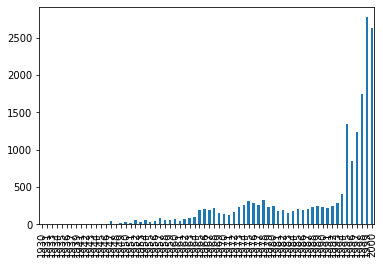

In [45]:
# Plotando os gráfico de valores de 
ufo.Year.value_counts().sort_index().plot(kind = 'bar')